In [2]:
import os
import re
import cv2

import numpy as np
import matplotlib.pyplot as plt

!pip install pycocotools
from pycocotools.coco import COCO

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
COCO categories: 
butterfly squirrel

COCO supercategories: 
butterfly squirrel
./Nature/train/view/../butterfly (107).jpg


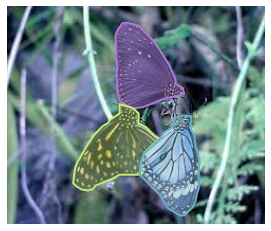

In [3]:
dataDir='./Nature/train/'
annFile=os.path.join(os.getcwd(), './Nature/dataset-read_with_dir.json')

# initialize COCO api for instance annotations
coco=COCO(annFile)

# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['butterfly', 'squirrel']); # squirrel butterfly
imgIds = coco.getImgIds(catIds=catIds );
img = coco.loadImgs(10)[0]

randImgPath=dataDir+"view/"+img['file_name']
print(randImgPath)
image = cv2.imread(randImgPath)
plt.imshow(image); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)
